<a href="https://colab.research.google.com/github/AlanLovera/Procesamiento-de-Datos/blob/main/SalariosDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Importamos librerias con las que se va a trabajar
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#Carga del archivo
datos = pd.read_csv('salarios.csv')


In [28]:
#Imprimimos primeras 5 filas
print(datos.head(5))

    año  experiencia   modalidad                       posicion  salario  \
0  2023       Senior   Full Time            Cientifico de datos    80000   
1  2023  Semi Senior  Contractor  Ingeniero de Machine Learning    30000   
2  2023  Semi Senior  Contractor  Ingeniero de Machine Learning    25500   
3  2023       Senior   Full Time            Cientifico de datos   175000   
4  2023       Senior   Full Time            Cientifico de datos   120000   

  moneda  salario_en_dolares localidad esquema localidad_empresa  \
0    EUR               85847        ES  Remoto                ES   
1    USD               30000        US  Remoto                US   
2    USD               25500        US  Remoto                US   
3    USD              175000        CA  Remoto                CA   
4    USD              120000        CA  Remoto                CA   

  tamaño_empresa  
0              L  
1              S  
2              S  
3              M  
4              M  


In [ ]:
# Consulta: Mostrar la cantidad total de registros en el DataFrame
total_registros = len(datos)
print("Cantidad total de registros:", total_registros)

Cantidad total de registros: 1000


In [29]:
#Conocemos las columnas
datos.columns

Index(['año', 'experiencia', 'modalidad', 'posicion', 'salario', 'moneda',
       'salario_en_dolares', 'localidad', 'esquema', 'localidad_empresa',
       'tamaño_empresa'],
      dtype='object')

In [30]:
#Obtenemos Información del DataSet
datos.info

<bound method DataFrame.info of       año  experiencia   modalidad                       posicion  salario  \
0    2023       Senior   Full Time            Cientifico de datos    80000   
1    2023  Semi Senior  Contractor  Ingeniero de Machine Learning    30000   
2    2023  Semi Senior  Contractor  Ingeniero de Machine Learning    25500   
3    2023       Senior   Full Time            Cientifico de datos   175000   
4    2023       Senior   Full Time            Cientifico de datos   120000   
..    ...          ...         ...                            ...      ...   
995  2023       Senior   Full Time  Ingeniero de Machine Learning   142200   
996  2023  Semi Senior   Full Time            Cientifico de datos    40000   
997  2023       Senior   Full Time            Cientifico de datos  1000000   
998  2023       Senior   Full Time              Analista de datos   180180   
999  2023       Senior   Full Time              Analista de datos   106020   

    moneda  salario_en_dolares 

In [31]:
#Datos por experiencia
datos.loc[datos.experiencia=='Semi Senior']

,año,experiencia,modalidad,posicion,salario,moneda,salario_en_dolares,localidad,esquema,localidad_empresa,tamaño_empresa
1,2023,Semi Senior,Contractor,Ingeniero de Machine Learning,30000,USD,30000,US,Remoto,US,S
2,2023,Semi Senior,Contractor,Ingeniero de Machine Learning,25500,USD,25500,US,Remoto,US,S
19,2023,Semi Senior,Full Time,Analista de datos,150000,USD,150000,US,Remoto,US,M
20,2023,Semi Senior,Full Time,Analista de datos,110000,USD,110000,US,Remoto,US,M
35,2023,Semi Senior,Full Time,Ingeniero de datos,162500,USD,162500,US,Presencial,US,M
...,...,...,...,...,...,...,...,...,...,...,...
969,2023,Semi Senior,Full Time,Investigador de datos,125000,USD,125000,US,Presencial,US,M
971,2022,Semi Senior,Full Time,Analista de datos,48000,BRL,9289,BR,Remoto,BR,M
988,2023,Semi Senior,Full Time,Ingeniero de Machine Learning,200000,USD,200000,US,Presencial,US,M
989,2023,Semi Senior,Full Time,Ingeniero de Machine Learning,175000,USD,175000,US,Presencial,US,M


In [32]:
#Filtrado de ddatos por experiencia y Titulo
datos_filtrados = datos[(datos.experiencia =='Semi Senior')&(datos.posicion=='Cientifico de datos')]
datos_filtrados.head(5)

,año,experiencia,modalidad,posicion,salario,moneda,salario_en_dolares,localidad,esquema,localidad_empresa,tamaño_empresa
80,2023,Semi Senior,Full Time,Cientifico de datos,510000,HKD,65062,HK,Presencial,HK,L
156,2023,Semi Senior,Full Time,Cientifico de datos,1700000,INR,20670,IN,Remoto,IN,L
181,2023,Semi Senior,Full Time,Cientifico de datos,55000,GBP,66837,GB,Presencial,GB,M
182,2023,Semi Senior,Full Time,Cientifico de datos,45000,GBP,54685,GB,Presencial,GB,M
336,2023,Semi Senior,Full Time,Cientifico de datos,93918,USD,93918,US,Remoto,US,M


In [33]:
#Agrupamos datos
agrupados = datos.groupby(['experiencia', 'posicion']).salario_en_dolares.agg([min,max])
print(agrupados)

                                               min     max
experiencia posicion                                      
Executive   Analista de datos                15000  221000
            Arquitecto de datos             155000  180000
            Cientifico de datos             100000  258750
            Ingeniero de datos              106500  310000
            Lider de equipo                 106000  353200
Junior      Analista de datos                21461  150000
            Cientifico de Machine Learning   42923   42923
            Cientifico de datos              51753  213660
            Ingeniero de BI                  60000   60000
            Ingeniero de Machine Learning    56536  300000
            Ingeniero de datos               17022  220000
            Investigador de datos           100000  220000
Semi Senior Analista de datos                 9289  206000
            Arquitecto de datos             106500  167500
            Cientifico de Machine Learning  125000  2300

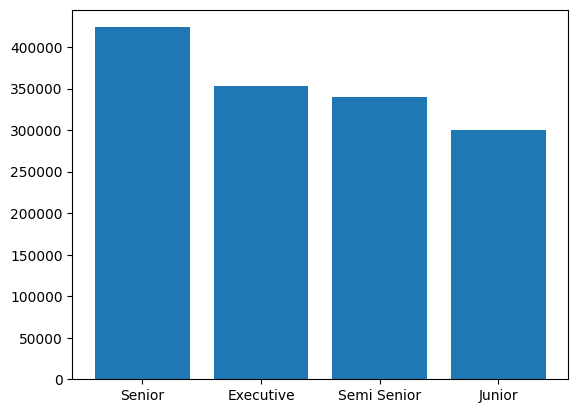

In [34]:
#Graficamos los datos de experiencia y salario
datos_orden = datos.sort_values('salario_en_dolares', ascending=False)
plt.bar(datos_orden['experiencia'], datos_orden['salario_en_dolares'])
plt.show()